In [ ]:
import numpy as np
from sklearn.preprocessing import normalize
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from numpy.polynomial.polynomial import polyval
import scipy

# **Q1**.
Write a computer program which computes the Jordan canonical form for an arbitrary n × n matrix with n ≤ 4.

# **Q2**. 
Write a computer program which computes the orthogonal diagonalization for an arbitrary $n × n$ symmetric matrix with $n ≤ 4$, i.e., given the input of a symmetric matrix S, the computer outputs an orthogonal matrix A and a diagonal matrix D such that $S = ADA^t .$



In [ ]:

def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)
# Test Data
one = np.array([[2,0,1], [0,1,0], [1,0,2]])
two = np.array([[3 ,-6, 0,3], [-6,0,6,3], [0,6,-3,-3],[3,3,-3,1]])
three = np.array([[2,-1,0], [-1,2,0], [0,0,3]])
four = np.array([[5 ,-1, -1,-1], [-1,5,-1,-1], [-1,-1,5,-1],[-1,-1,-1,5]])
# print(three)
six = np.ones((6,6))
np.fill_diagonal(six,3)

def diag(symmetric):
    assert check_symmetric(symmetric),"not symmetric"
    print(symmetric)
    print("\n")
    eig_val, eig_vec = np.linalg.eigh(symmetric)
    # print(f'eig_vec\n{eig_vec}')
    A = normalize(eig_vec) 
    
    # diagonal = np.expand_dims(eig_val,axis=1)
    D = np.zeros_like(A) #create zeros matrix to insert diagonal
    np.fill_diagonal(D, eig_val)

    return A,D

def check_ans(symmetric):
    ori = symmetric
    A,D = diag(symmetric)
    ans = A @ D @ A.T 
    print(f'A:\n{A}')
    print(f'D:\n{D}')
    print("\n")
    print(ans)
    assert np.allclose(ori,ans), "two matrix are not similar"
    print("Seems correct")

check_ans(two)

[[ 3 -6  0  3]
 [-6  0  6  3]
 [ 0  6 -3 -3]
 [ 3  3 -3  1]]


A:
[[-0.34323995  0.61196932  0.20273745  0.68306472]
 [-0.6133254   0.2113852   0.43272731 -0.62601544]
 [ 0.59775148  0.72326351 -0.00627742 -0.34575086]
 [ 0.38563124 -0.24020773  0.87841061  0.14826865]]
D:
[[-11.09173421   0.           0.           0.        ]
 [  0.          -0.25005568   0.           0.        ]
 [  0.           0.           3.19171592   0.        ]
 [  0.           0.           0.           9.15007398]]


[[ 3.00000000e+00 -6.00000000e+00 -6.27492152e-16  3.00000000e+00]
 [-6.00000000e+00  2.99191147e-15  6.00000000e+00  3.00000000e+00]
 [-5.58965597e-16  6.00000000e+00 -3.00000000e+00 -3.00000000e+00]
 [ 3.00000000e+00  3.00000000e+00 -3.00000000e+00  1.00000000e+00]]
Seems correct


# **Q3**. 
Consider 5 different data plots each consisting of at least 50 data points which lie in
the xy-plane. You can randomly generate your own data or use pre-existing data. A data repository can be found here: https://archive.ics.uci.edu/ml/index.php



In [ ]:
# # Dataset 1
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip >> /dev/null
!unzip -n student.zip >/dev/null

--2021-06-06 12:53:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20478 (20K) [application/x-httpd-php]
Saving to: ‘student.zip’

student.zip         100%[===================>]  20.00K  --.-KB/s    in 0.1s    

2021-06-06 12:53:19 (134 KB/s) - ‘student.zip’ saved [20478/20478]



(a) For each data set, use a computer to solve the corresponding matrix equation $A^† Ax = A^† b$ for modeling the data with the best fit line of the form $y = a_1 x + a_0$ , and in each case, compute $d(b, C(A))$.

(b) For each data set, use a computer to solve the corresponding matrix equation $A^† Ax = A^† b$ for modeling the data with the best fit parabola of the form $y = a_2 x^2 + a_1^x + a_0$ , and in
each case, compute $d(b, C(A))$.

## Dataset 1

In [ ]:
tips = sns.load_dataset("tips")
tips.head()
# sns.scatterplot(data=tips, x="total_bill", y="tip")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
def custom_lstsq(A,b):
    part1 = np.linalg.inv(np.matrix(A).getH() @ A) # 
    part2 =  A.T @ b
    sol = np.squeeze(np.array(part1@part2),0)
    true_label =np.linalg.lstsq(A,b,rcond=None)[0]
    assert np.allclose(sol,true_label),"wrong custom solution"
    return sol

def best_fit(x,y, second_order = False):
    if(second_order):
        x2 = np.array(x**2)
        A = np.vstack([x2 ,x,np.ones(len(x))]).T
    else:
        A = np.vstack([x, np.ones(len(x))]).T
    # print(x1.shape)
    
    sol = custom_lstsq(A,y)
    print(f'sol: {sol}')
    y1 =polyval(x,sol[::-1])# m*x1 + c
    sns.lineplot(x=x,y=y1,color="red")
    plt.ylabel('y')
    sns.scatterplot(data=tips, x=x, y=y)
    return y1

# d(b, C(A))
def proj(v,W): #proj_w(v)
    assert v.shape[0]==W.shape[0], f"w should be {v.shape[0]}"
    num = (np.inner(W,v) * W)
    den =  np.inner(W,W)
    return np.divide(num,den)

def distance(v,W):
    proj_b_ca = b1 - Ax
    return np.linalg.norm(proj_b_ca)

def column_space(A):
    A = np.conj(A).T
    # print(A)
    c_space = scipy.linalg.null_space(A).T
    print(f"column space: {c_space.shape}")
    return c_space


sol: [0.10502452 0.92026961]
d(b,C(A)) = 15.899331553583503


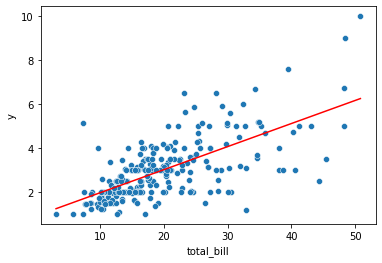

In [ ]:
x1 = tips["total_bill"]
b1 = tips["tip"]
Ax = best_fit(x1,b1)

print(f'd(b,C(A)) = {distance(b1,Ax)}')


In [ ]:
# sns.regplot(x1,b1,fit_reg=True)

In [ ]:
# sns.regplot(x1,b1,fit_reg=True,order=3)

sol: [-5.71031271e-05  1.07855549e-01  8.91116961e-01]
d(b,C(A)) =15.899035277521403


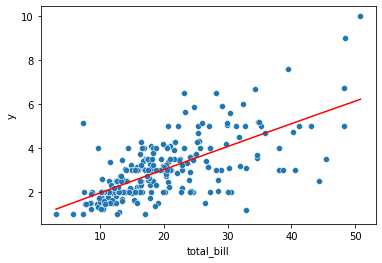

In [ ]:
Ax = best_fit(x1,b1,second_order=True)
print(f'd(b,C(A)) ={distance(b1,Ax)}')

## Dataset 2

In [ ]:
!wget https://raw.githubusercontent.com/datasets/covid-19/main/data/time-series-19-covid-combined.csv
covid=pd.read_csv("time-series-19-covid-combined.csv")
malaysia=covid.loc[covid['Country/Region'] == "Malaysia"]
malaysia.head()

--2021-06-06 12:54:57--  https://raw.githubusercontent.com/datasets/covid-19/main/data/time-series-19-covid-combined.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5091228 (4.9M) [text/plain]
Saving to: ‘time-series-19-covid-combined.csv’

time-series-19-covi 100%[===================>]   4.85M  --.-KB/s    in 0.1s    

2021-06-06 12:54:58 (38.0 MB/s) - ‘time-series-19-covid-combined.csv’ saved [5091228/5091228]



,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
88176,2020-01-22,Malaysia,NaN,0,0.0,0
88177,2020-01-23,Malaysia,NaN,0,0.0,0
88178,2020-01-24,Malaysia,NaN,0,0.0,0
88179,2020-01-25,Malaysia,NaN,3,0.0,0
88180,2020-01-26,Malaysia,NaN,4,0.0,0


sol: [3.90027938e-03 5.22434032e+01]
d(b,C(A)) =2466.3219940208583


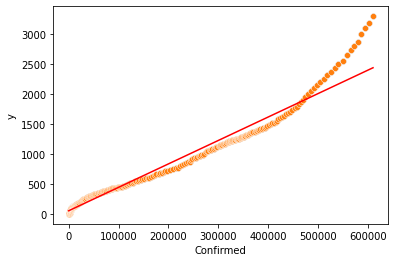

In [ ]:

# matplotlib.dates.date2num(malaysia["month"])
# pd.plotting.register_matplotlib_converters()
sns.scatterplot(data=malaysia, y="Deaths", x="Confirmed")
x1 = malaysia["Confirmed"]
b1 = malaysia["Deaths"]
Ax = best_fit(x1,b1,second_order=False)

print(f'd(b,C(A)) ={distance(b1,Ax)}')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


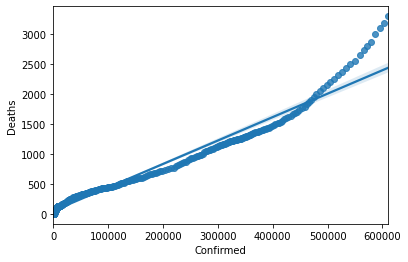

In [ ]:
# sns.regplot(x1,b1,fit_reg=True)

sol: [3.85343957e-09 2.21383645e-03 9.62291932e+01]
d(b,C(A)) =1608.7357583083876


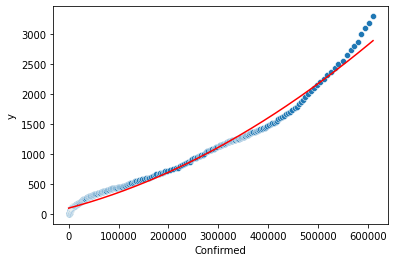

In [ ]:
Ax = best_fit(x1,b1,second_order=True)
print(f'd(b,C(A)) ={distance(b1,Ax)}')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


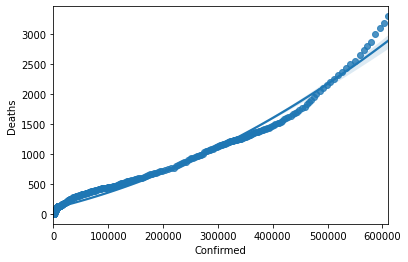

In [ ]:
# sns.regplot(x1,b1,fit_reg=True,order=2)

## Dateset 3

In [ ]:
china=covid.loc[covid['Country/Region'] == "China"]
china = china.drop(columns=["Province/State"])

sol: [  0.06322969 -36.80737044]
d(b,C(A)) =14076.395632772967


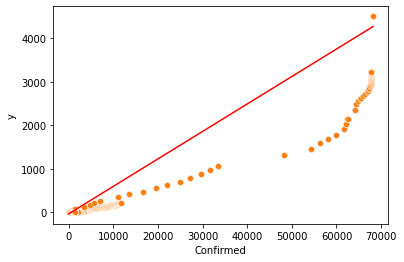

In [ ]:
sns.scatterplot(data=china, y="Deaths", x="Confirmed")
x1 = china["Confirmed"]
b1 = china["Deaths"]
Ax = best_fit(x1,b1,second_order=False)

print(f'd(b,C(A)) ={distance(b1,Ax)}')

sol: [9.09025536e-07 1.61002503e-03 3.22427351e+00]
d(b,C(A)) =10691.03748166029


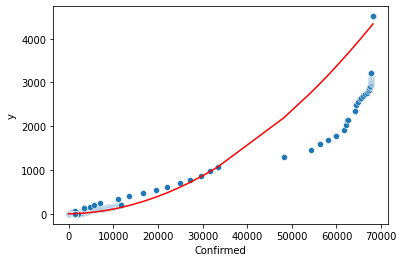

In [ ]:
Ax = best_fit(x1,b1,second_order=True)

print(f'd(b,C(A)) ={distance(b1,Ax)}')